In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms

from microrobot_dl.data_loader import PoseImageDataset


# example transform (single-channel)
transform_gray = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor(),  # yields C=1
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]
)

dataset = PoseImageDataset(
    data_dirs=["robot_1_four_ball", "robot_2_six_ball"],
    base_dir="data/Image_Pose",
    transform=transform_gray,
)
print("num samples =", len(dataset))
print("labels =", dataset.idx_to_label)

dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)
for imgs, labels in dataloader:
    print("batch imgs", imgs.shape, "batch labels", labels)
    break

num samples = 37512
labels = ['P0_R0', 'P0_R10', 'P0_R20', 'P0_R30', 'P0_R40', 'P0_R50', 'P0_R60', 'P0_R70', 'P10_R10', 'P10_R20', 'P10_R30', 'P10_R40', 'P10_R50', 'P10_R60', 'P10_R70', 'P20_R20', 'P20_R30', 'P20_R40', 'P20_R50', 'P20_R60', 'P20_R70', 'P30_R30', 'P30_R40', 'P30_R50', 'P30_R70', 'P40_R40', 'P40_R50', 'P40_R60', 'P40_R70', 'P50_R50', 'P50_R60', 'P50_R70', 'P60_R60', 'P60_R70', 'P70_R70', 'P10_R0', 'P20_R0', 'P30_R0', 'P40_R0', 'P50_R0', 'P60_R0']
batch imgs torch.Size([8, 1, 256, 256]) batch labels tensor([38,  0, 40, 38, 11,  7,  2,  3])


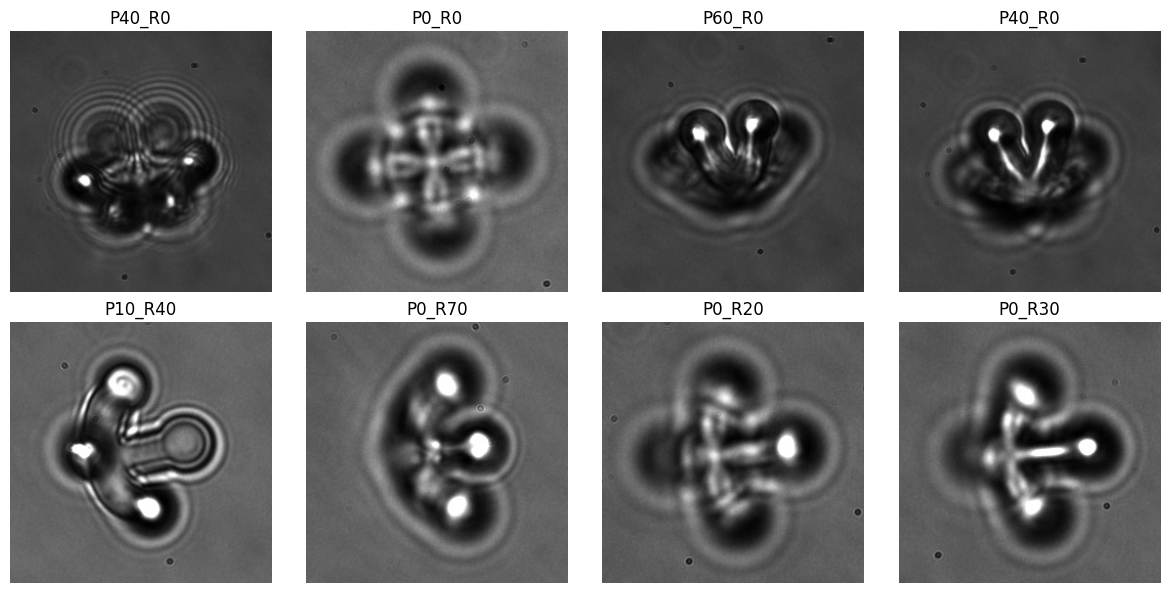

In [6]:
import matplotlib.pyplot as plt

batch_size = imgs.shape[0]
cols = 4
rows = (batch_size + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
axes = axes.flatten()

for i in range(len(axes)):
    ax = axes[i]
    if i < batch_size:
        img = imgs[i].detach().cpu()
        # denormalize (normalize was mean=0.5, std=0.5)
        img = img * 0.5 + 0.5
        img_np = img.squeeze().numpy()  # C=1 -> HxW
        ax.imshow(img_np, cmap="gray")
        lbl_idx = int(labels[i].item())
        label_name = (
            dataset.idx_to_label[lbl_idx]
            if hasattr(dataset, "idx_to_label") and lbl_idx < len(dataset.idx_to_label)
            else str(lbl_idx)
        )
        ax.set_title(f"{label_name}")
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()